In [84]:
#DBSCAN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
%matplotlib inline

In [7]:
df = pd.read_csv('size-scale.csv')

In [17]:
df.head()

,X1,X2
0,0.046733,1.765120
1,-8.994134,-6.508186
2,0.650539,1.264533
3,-9.501554,-6.736493
4,0.057050,0.188215


In [179]:
len(df)

1000

<Axes: xlabel='X1', ylabel='X2'>

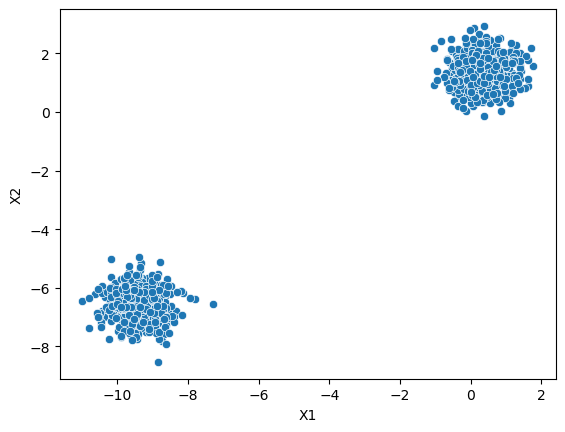

In [82]:
sns.scatterplot(data=df,x='X1',y='X2')

In [38]:
def add_noise(df, columns, num_noisy_points, noise_level=1.5):
    noisy_df = df.copy()
    n_rows = 10   
    # Ensure num_noisy_points does not exceed the number of rows
    num_noisy_points = min(num_noisy_points, n_rows)
    # Randomly select rows to add noise
    noisy_indices = np.random.choice(n_rows, num_noisy_points, replace=False) 
    for column in columns:
        noise = np.random.normal(0, noise_level, size=num_noisy_points)
        noisy_df.loc[noisy_indices, column] += noise
    return noisy_df

In [137]:
noisy_df = add_noise(df, ['X1', 'X2'],num_noisy_points=8, noise_level=3.5)

<Axes: xlabel='X1', ylabel='X2'>

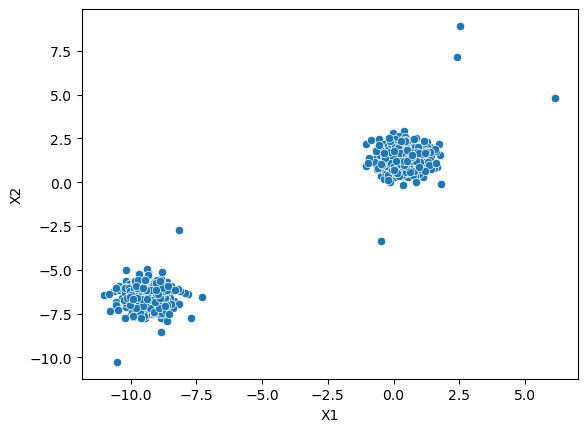

In [139]:
sns.scatterplot(data=noisy_df,x='X1',y='X2')

In [57]:
def display_categories(model,noisy_df):
    labels = model.fit_predict(noisy_df)
    sns.scatterplot(data=noisy_df,x='X1',y='X2',hue=labels,palette='Set1')

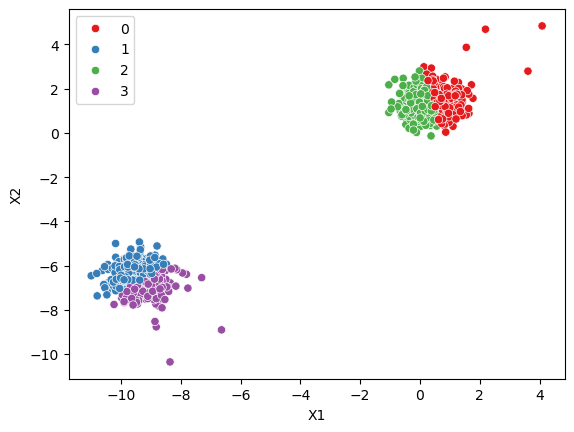

In [59]:
model = KMeans(n_clusters = 4)
display_categories(model,noisy_df)

In [63]:
model = DBSCAN(eps=0.6)

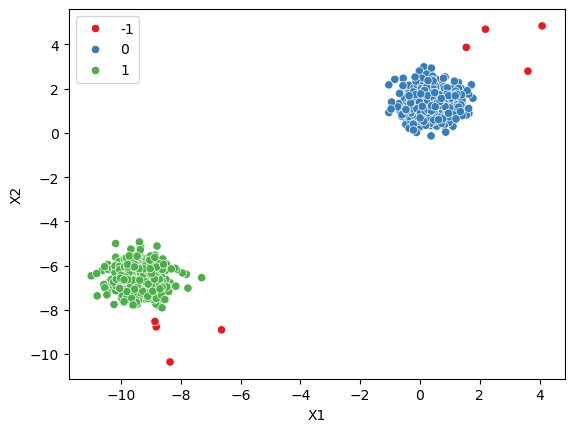

In [65]:
display_categories(model,noisy_df)

In [69]:
outlier_percent = []
number_of_outliers = []

for eps in np.linspace(0.001,10,100):  
    # Create Model
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(noisy_df)   
    # number of Outliers
    number_of_outliers.append(np.sum(dbscan.labels_ == -1))
    #percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    outlier_percent.append(perc_outliers)

Text(0.5, 0, 'Epsilon Value')

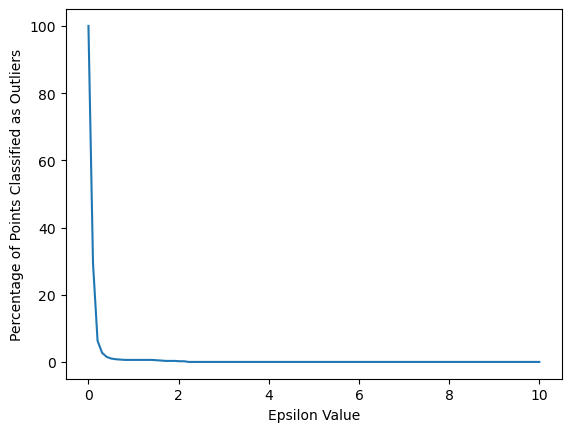

In [72]:
sns.lineplot(x=np.linspace(0.001,10,100),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")

(0.0, 1.0)

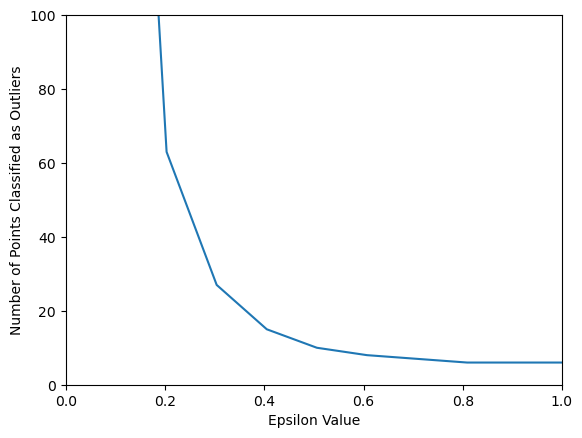

In [79]:
sns.lineplot(x=np.linspace(0.001,10,100),y=number_of_outliers)
plt.ylabel("Number of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.ylim(0,100)
plt.xlim(0,1)

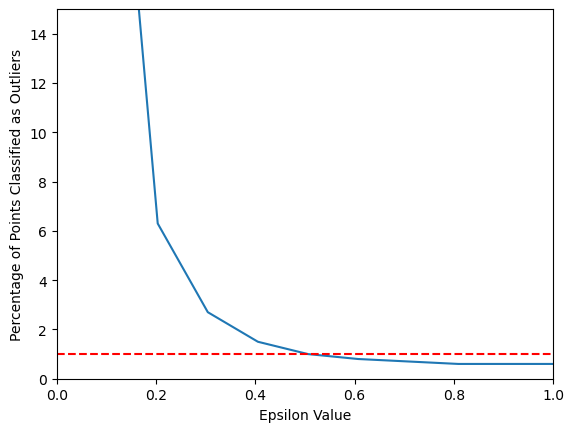

In [167]:
sns.lineplot(x=np.linspace(0.001,10,100),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.ylim(0,15)
plt.xlim(0,1)
plt.hlines(y=1,xmin=0,xmax=2,colors='red',ls='--')

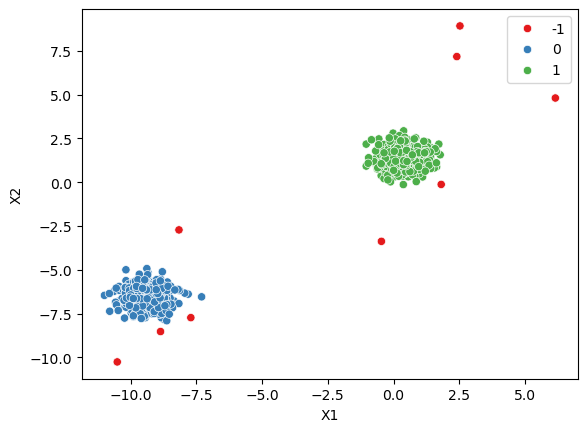

In [181]:
dbscan = DBSCAN(eps=0.58)
display_categories(dbscan,noisy_df)

In [188]:
outlier_percent = []
for n in np.arange(1,100):   
    # Create Model
    dbscan = DBSCAN(min_samples=n)
    dbscan.fit(noisy_df)  
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    outlier_percent.append(perc_outliers)

Text(0.5, 0, 'Minimum Number of Samples')

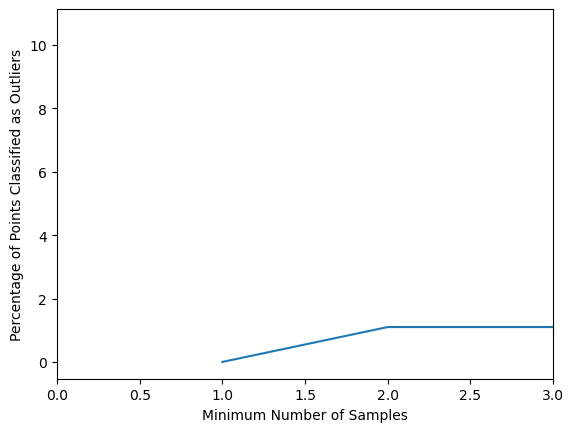

In [204]:
sns.lineplot(x=np.arange(1,100),y=outlier_percent)
plt.xlim(0,3)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Minimum Number of Samples")

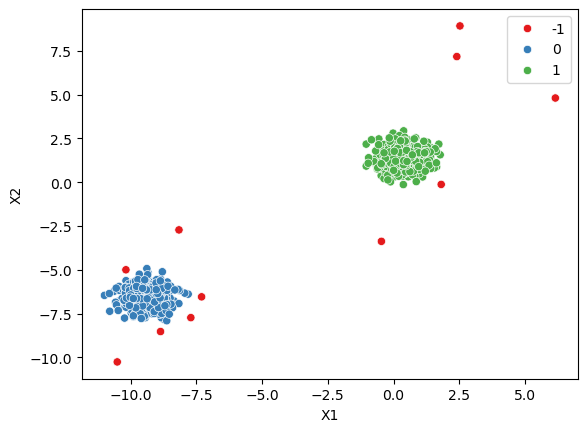

In [214]:
dbscan = DBSCAN(min_samples=2)
display_categories(dbscan,noisy_df)